**4. Obtener el gradiente morfológico ∇(I) = (I ⊕ B) − (I ⊖ B) de la imagen brain-scan.jpeg. Explicar cuál es el resultado obtenido y explicar por qué se le llama gradiente. (Sugerencia: experimentar con otras imágenes en escala de grises para entender el resultado de esta operación).**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar la imagen
image_path = "img/brain-scan.jpeg"
img = cv2.imread(image_path)

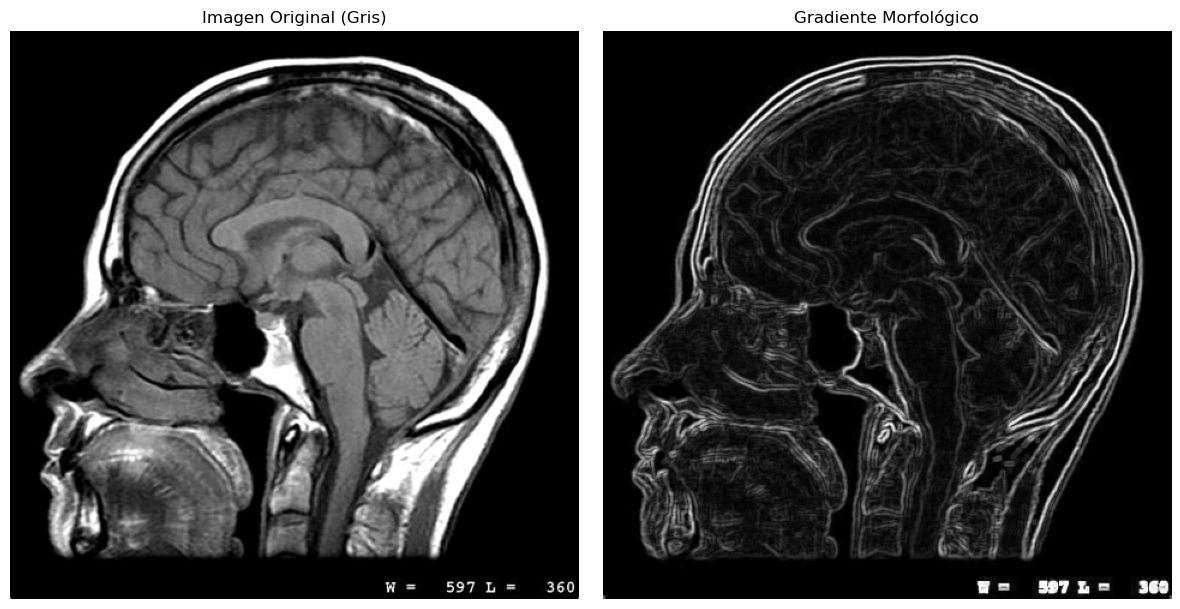

In [4]:

if img is None:
    print("Error al cargar la imagen.")
else:
    # Convertir a escala de grises si es necesario
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    
    # Definir un elemento estructurante (kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # Calcular la dilatación y la erosión
    dilation = cv2.dilate(gray, kernel, iterations=1)
    erosion = cv2.erode(gray, kernel, iterations=1)
    
    # Calcular el gradiente morfológico: (I ⊕ B) - (I ⊖ B)
    gradient = cv2.subtract(dilation, erosion)
    
    # Mostrar la imagen original y el gradiente
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Imagen Original (Gris)")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient, cmap='gray')
    plt.title("Gradiente Morfológico")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

El gradiente morfológico se obtiene restando la erosión de la imagen dilatada, lo que resalta los bordes y contornos al enfatizar las transiciones en la intensidad de los píxeles. Se le llama "gradiente" porque, al igual que un gradiente en cálculo indica la tasa de cambio, esta operación mide la variación local en los niveles de gris, destacando así las zonas donde se producen cambios bruscos de intensidad.